In [68]:
from os import listdir
from os.path import isfile, join
import lumicks.pylake as pylake
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from lumicks import pylake
import math
from multipletau import autocorrelate
import array
import lmfit
import scipy as sp
import numpy as np
from scipy.interpolate import interp1d
from obspy.signal.detrend import spline
from os import listdir
from os.path import isfile, join

files = listdir()
scans = []
fraps=[]
for file in files:
    if '.tif' in file :
        scans.append(file)

In [113]:
# RGRGG cy5
import os
# input the directory of the folder containing the scans and FRAPs you want to convert to tiff and then execute all 
testdir = r"E:\Anurag_data\RNA clusters\ASO sample\Sample 2\30 min_1"
os.listdir(testdir)
os.chdir(testdir)
os.getcwd()

files = listdir()
scans = []
fraps=[]
for file in files:
    if 'tif' in file  :
        scans.append(file)
index = np.arange(len(scans))
insca = zip(list(index),scans)
list(insca)


[(0, '5_Ch2 cropped.tif'), (1, '5_Ch2.tif')]

(200, 200)


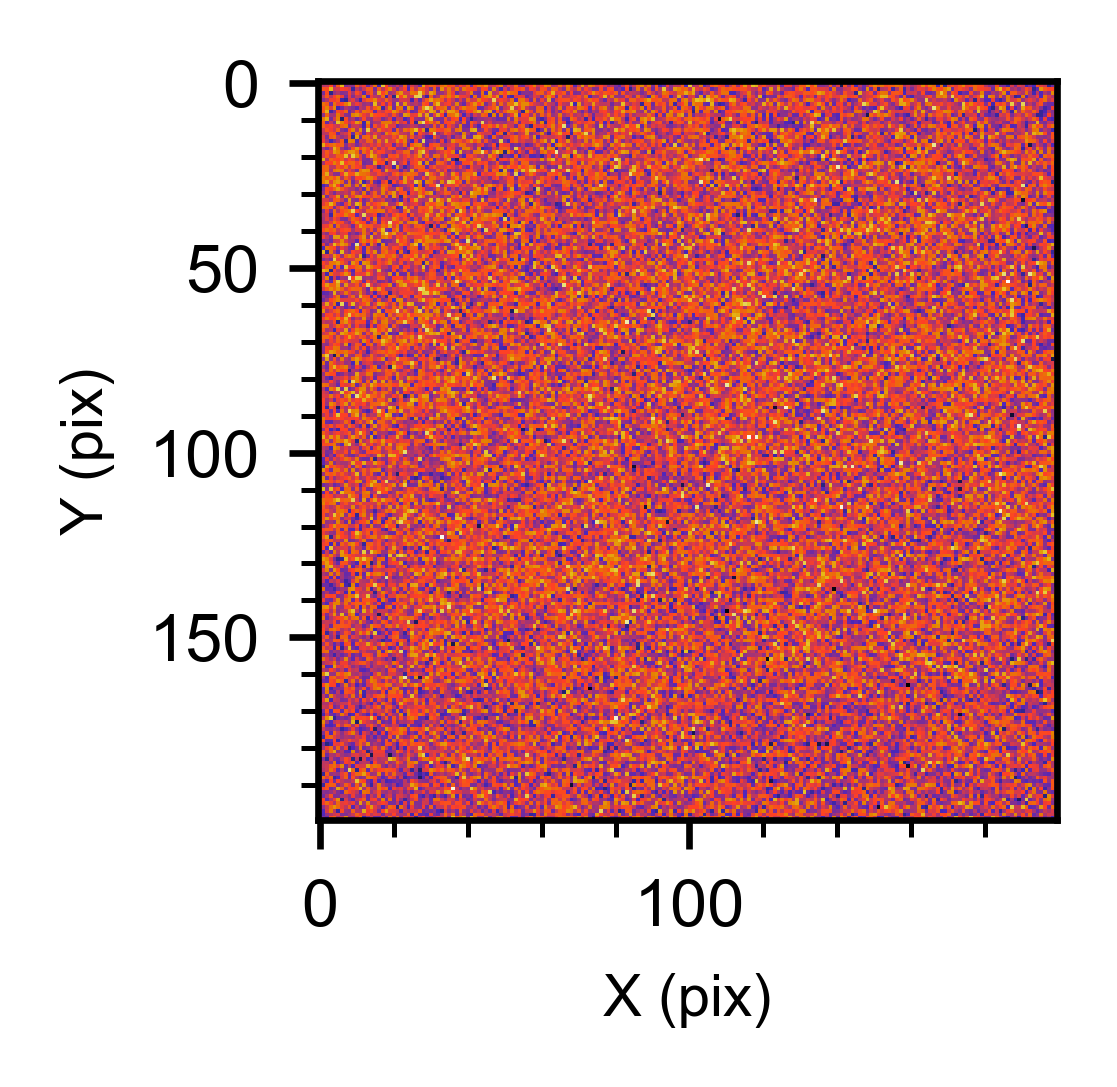

In [114]:
## Image analysis
i=0

from skimage import io
im = io.imread(scans[i])
print(im.shape)
#im=im[:,:,1]
plt.rcParams['font.sans-serif'] = "Arial"

plt.figure(figsize=(1.6,1.6),dpi=600)
plt.imshow(im,cmap='CMRmap')
plt.xticks(fontsize=8)
plt.minorticks_on()
plt.yticks(fontsize=8)
plt.minorticks_on()
plt.xlabel('X (pix)',fontsize=7)
plt.ylabel('Y (pix)',fontsize=7)
#cbar=plt.colorbar()
#cbar.ax.tick_params(labelsize=6)
plt.savefig('Image.svg',bbox_inches='tight')
plt.savefig('Image.png',bbox_inches='tight')

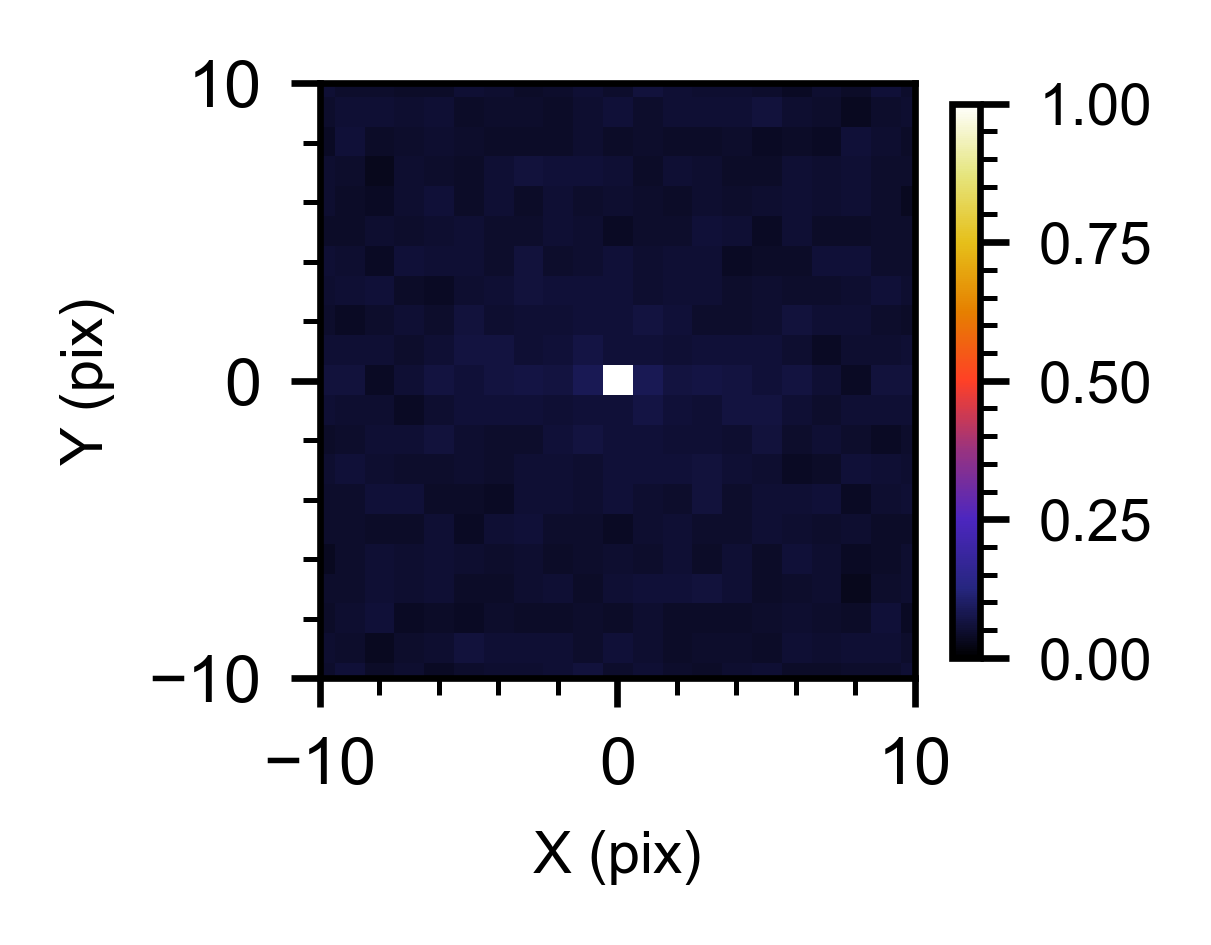

In [115]:
plt.figure(figsize=(1.6,1.6),dpi=600)
FFT = np.real(np.fft.fft2(im))
PS = FFT**2
NPS=PS/max(PS.ravel())
ACF=(np.fft.ifft2((NPS)))
ACFM=ACF/max(ACF.ravel())
NACF=(ACFM-min(ACFM.ravel()))/(1-min(ACFM.ravel()))
SACF=np.real(np.fft.fftshift(NACF))
plt.imshow((SACF),extent=[-SACF.shape[0]/2 -0.5 ,SACF.shape[0]/2 -0.5  ,-SACF.shape[0]/2 +0.5 ,SACF.shape[0]/2 +0.5 ],cmap='CMRmap')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.xticks(fontsize=8)
plt.minorticks_on()
plt.yticks(fontsize=8)
plt.minorticks_on()
plt.xlabel('X (pix)',fontsize=7)
plt.ylabel('Y (pix)',fontsize=7)
cbar=plt.colorbar(shrink=0.75)
cbar.minorticks_on()
tick_font_size=7
cbar.ax.tick_params(labelsize=tick_font_size)
plt.savefig('spatial autocorrelation.png',bbox_inches='tight')
plt.savefig('spatial autocorrelation.svg',bbox_inches='tight')

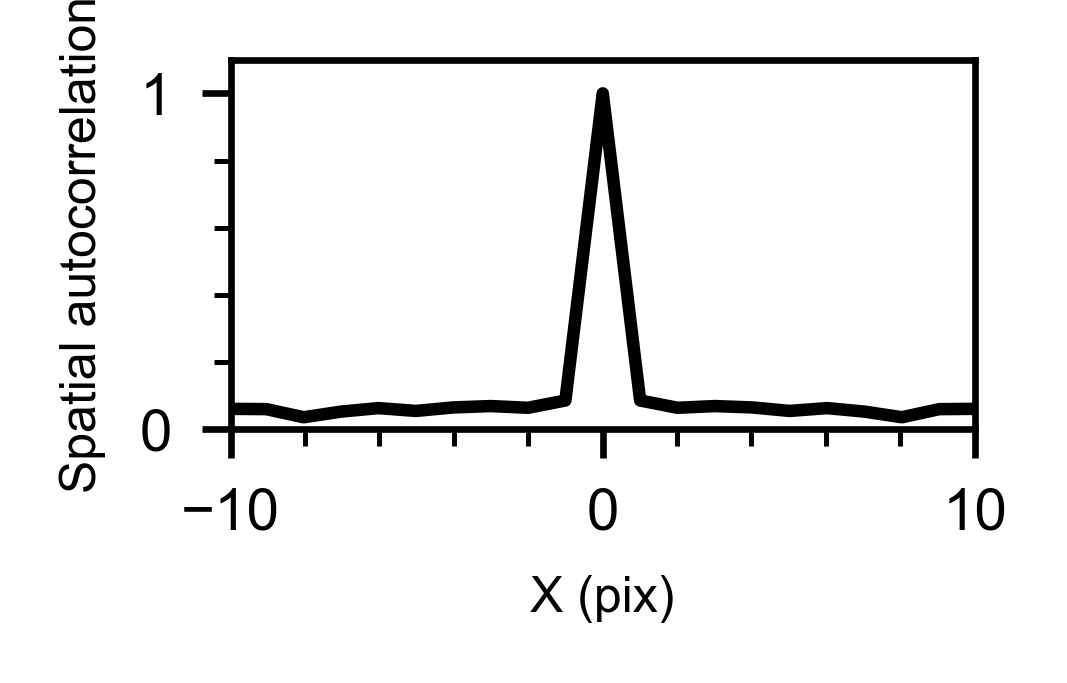

In [116]:
plt.figure(figsize=(1.6,1.6/2),dpi=600)
x_axis=np.linspace(-SACF.shape[0]/2 -0.5,SACF.shape[0]/2 -0.5,SACF.shape[0])
plt.plot(x_axis,np.real(SACF[100,:]),'k')
np.savetxt("spatial corralation profile.txt", np.transpose(np.array([x_axis,np.real(SACF[100,:])])))
plt.xlim(-10,10)
plt.ylim(0,1.1)
plt.xticks(fontsize=7)
plt.minorticks_on()
plt.yticks(fontsize=7)
plt.minorticks_on()
plt.xlabel('X (pix)',fontsize=6)
plt.ylabel('Spatial autocorrelation',fontsize=6)
plt.savefig('spatial autocorrelation profile.png',bbox_inches='tight')
plt.savefig('spatial autocorrelationprofile.svg',bbox_inches='tight')